In [17]:
import mlflow
import mlflow.sklearn
import logging
import sys
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import os
import sys
import string

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
df = pd.read_csv('data.csv')

In [19]:
def lemmatization(text):
    """Lemmatize the text."""
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(text)

def remove_stop_words(text):
    """Remove stop words from the text."""
    stop_words = set(stopwords.words("english"))
    text = [word for word in str(text).split() if word not in stop_words]
    return " ".join(text)

def removing_numbers(text):
    """Remove numbers from the text."""
    text = ''.join([char for char in text if not char.isdigit()])
    return text

def lower_case(text):
    """Convert text to lower case."""
    text = text.split()
    text = [word.lower() for word in text]
    return " ".join(text)

def removing_punctuations(text):
    """Remove punctuations from the text."""
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = text.replace('؛', "")
    text = re.sub('\s+', ' ', text).strip()
    return text

def removing_urls(text):
    """Remove URLs from the text."""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def normalize_text(df):
    """Normalize the text data."""
    try:
        df['review'] = df['review'].apply(lower_case)
        df['review'] = df['review'].apply(remove_stop_words)
        df['review'] = df['review'].apply(removing_numbers)
        df['review'] = df['review'].apply(removing_punctuations)
        df['review'] = df['review'].apply(removing_urls)
        df['review'] = df['review'].apply(lemmatization)
        return df
    except Exception as e:
        print(f'Error during text normalization: {e}')
        raise


In [20]:
nltk.download('wordnet')
df = normalize_text(df)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,every great gangster movie under current human...,positive
1,saw film last night say loved every minute tak...,positive
2,film mildly entertaining one neglect acknowled...,negative
3,quentin tarantino s partner crime roger avary ...,negative
4,sat tv hoping name would worth time but dear g...,negative


In [21]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})
df.head()

,review,sentiment
0,every great gangster movie under current human...,1
1,saw film last night say loved every minute tak...,1
2,film mildly entertaining one neglect acknowled...,0
3,quentin tarantino s partner crime roger avary ...,0
4,sat tv hoping name would worth time but dear g...,0


In [22]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [30]:
X = df['review']
y = df['sentiment']

In [31]:
import dagshub
mlflow.set_tracking_uri("https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow")
dagshub.init(repo_owner='Jugal-lachhwani', repo_name='Data-Capstone-Project', mlflow=True)

2025-10-19 13:34:12,334 - INFO - HTTP Request: GET https://dagshub.com/api/v1/repos/Jugal-lachhwani/Data-Capstone-Project "HTTP/1.1 200 OK"


Initialized MLflow to track repo "Jugal-lachhwani/Data-Capstone-Project"

2025-10-19 13:34:12,345 - INFO - Initialized MLflow to track repo "Jugal-lachhwani/Data-Capstone-Project"


Repository Jugal-lachhwani/Data-Capstone-Project initialized!

2025-10-19 13:34:12,350 - INFO - Repository Jugal-lachhwani/Data-Capstone-Project initialized!


2025/10/19 13:14:02 INFO mlflow.tracking.fluent: Experiment with name 'GridSearchCV' does not exist. Creating a new experiment.


2025-10-19 13:14:03,223 - INFO - Vectorizer: CountVectorizer
2025-10-19 13:14:03,424 - INFO - Training model: LogisticRegression


2025-10-19 13:14:28,540 - INFO - CountVectorizer + LogisticRegression -> acc=0.704, f1=0.678


2025/10/19 13:14:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_LogisticRegression at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/1809fad185b24a21bee5206497c9b105.
2025/10/19 13:14:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


2025-10-19 13:14:29,959 - INFO - Training model: RandomForest


2025-10-19 13:14:57,977 - INFO - CountVectorizer + RandomForest -> acc=0.624, f1=0.535


2025/10/19 13:14:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_RandomForest at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/7d03c3ecc34040c5927778926d35fcc8.
2025/10/19 13:14:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


2025-10-19 13:15:00,033 - INFO - Vectorizer: TFIDFVectorizer
2025-10-19 13:15:00,152 - INFO - Training model: LogisticRegression


2025-10-19 13:15:28,085 - INFO - TFIDFVectorizer + LogisticRegression -> acc=0.664, f1=0.638


2025/10/19 13:15:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_LogisticRegression at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/978d8ee24fad448cb1e5a23faa236319.
2025/10/19 13:15:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


2025-10-19 13:15:29,983 - INFO - Training model: RandomForest


2025-10-19 13:15:58,497 - INFO - TFIDFVectorizer + RandomForest -> acc=0.712, f1=0.690


2025/10/19 13:15:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_RandomForest at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/6006952b6c3d48ec9ba7ab6fea0c4874.
2025/10/19 13:15:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


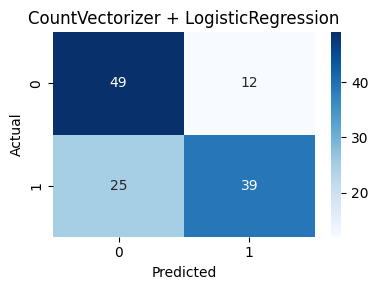

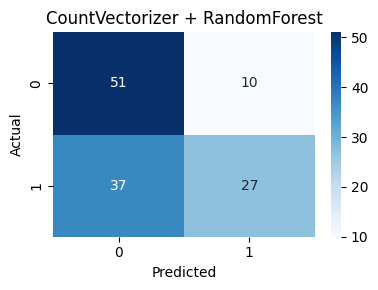

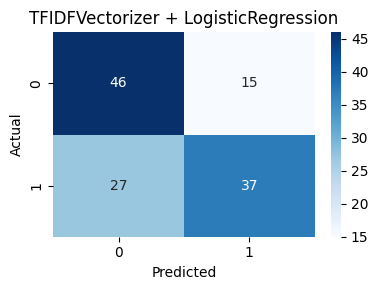

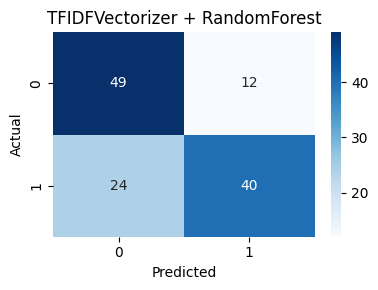

In [ ]:
mlflow.set_experiment('GridSearchCV')

# --- Logging setup for notebook ---
for h in logging.root.handlers[:]:
    logging.root.removeHandler(h)
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# --- Define preprocessing methods ---
vectorizers = {
    "CountVectorizer": CountVectorizer(max_features=100),
    "TFIDFVectorizer": TfidfVectorizer(max_features=100)
}

# --- Define algorithms and hyperparameters ---
models = {
    "LogisticRegression": {
        "estimator": LogisticRegression(max_iter=1000, random_state=42),
        "param_grid": {"C": [0.1, 1.0, 10.0]}
    },
    "RandomForest": {
        "estimator": RandomForestClassifier(random_state=42),
        "param_grid": {"n_estimators": [50, 100,150,200], "max_depth": [None, 10]}
    }
    
}



# --- Loop through all combinations ---
for vec_name, vec in vectorizers.items():
    logging.info(f"Vectorizer: {vec_name}")

    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    for model_name, model_info in models.items():
        logging.info(f"Training model: {model_name}")

        with mlflow.start_run(run_name=f"{vec_name}_{model_name}"):

            start_time = time.time()

            # Fit GridSearchCV
            grid = GridSearchCV(
                estimator=model_info["estimator"],
                param_grid=model_info["param_grid"],
                cv=3,
                n_jobs=-1,
                verbose=0
            )

            grid.fit(X_train_vec, y_train)
            best_model = grid.best_estimator_

            y_pred = best_model.predict(X_test_vec)

            # --- Calculate metrics ---
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # --- Log parameters ---
            mlflow.log_param("vectorizer", vec_name)
            mlflow.log_param("model", model_name)
            mlflow.log_params(grid.best_params_)

            # --- Log metrics ---
            mlflow.log_metrics({
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "f1": f1
            })

            # --- Log classification report ---
            report = classification_report(y_test, y_pred, output_dict=True)
            mlflow.log_dict(report, "classification_report.json")

            # --- Log confusion matrix ---
            conf = confusion_matrix(y_test, y_pred)
            conf_dict = {"confusion_matrix": conf.tolist()}
            mlflow.log_dict(conf_dict, "confusion_matrix.json")

            # --- Optional: confusion matrix plot ---
            plt.figure(figsize=(4,3))
            sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.title(f"{vec_name} + {model_name}")
            plt.tight_layout()
            plt.savefig("confusion_matrix.png")
            mlflow.log_artifact("confusion_matrix.png")

            # --- Log model ---
            input_example = (
                X_test_vec[:5].toarray() if scipy.sparse.issparse(X_test_vec)
                else X_test_vec[:5]
            )
            mlflow.sklearn.log_model(best_model, "model", input_example=input_example)

            end_time = time.time()
            mlflow.log_metric("training_time_sec", end_time - start_time)

            logging.info(f"{vec_name} + {model_name} -> acc={acc:.3f}, f1={f1:.3f}")

2025-10-19 14:13:02,523 - INFO - Vectorizer: CountVectorizer
2025-10-19 14:13:02,728 - INFO - Training model: LogisticRegression
2025-10-19 14:13:13,356 - INFO - Best params found: {'C': 0.1}


2025-10-19 14:13:39,184 - INFO - CountVectorizer + LogisticRegression -> acc=0.704, f1=0.678


2025/10/19 14:13:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_LogisticRegression_grid_0 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/01bd8fc457f14fd1a629dfdd1478105b.
2025/10/19 14:13:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.
2025/10/19 14:13:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_LogisticRegression_grid_1 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/8ee304f9bfb14f0eb1b9ef9475755e68.
2025/10/19 14:13:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.
2025/10/19 14:13:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_LogisticRegression_grid_2 at: https://dagshub.com/Jugal-lachhwani/Data-Capst

2025-10-19 14:13:54,330 - INFO - Training model: RandomForest


2025/10/19 14:14:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_RandomForest_grid_0 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/bc69e11a87c44eb28ccb52f5de49fb8f.
2025/10/19 14:14:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.
2025/10/19 14:14:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_RandomForest_grid_1 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/3c5105f9085e4a39bab4c8609f7562de.
2025/10/19 14:14:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


2025-10-19 14:14:16,435 - INFO - Best params found: {'max_depth': 10, 'n_estimators': 50}


2025-10-19 14:14:47,730 - INFO - CountVectorizer + RandomForest -> acc=0.624, f1=0.535



2025/10/19 14:14:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_RandomForest_grid_2 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/c1ae733cde054e949cc27f69fbc2bb1e.
2025/10/19 14:14:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.
2025/10/19 14:14:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_RandomForest_grid_3 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/c4a39e8dc00541d48a68551b52c81e8c.
2025/10/19 14:14:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


2025-10-19 14:14:55,963 - INFO - Vectorizer: TFIDFVectorizer
2025-10-19 14:14:56,065 - INFO - Training model: LogisticRegression


2025/10/19 14:15:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_LogisticRegression_grid_0 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/06fb0f9ed22946b9ad6b160231e5da11.
2025/10/19 14:15:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


2025-10-19 14:15:09,888 - INFO - Best params found: {'C': 1.0}


2025-10-19 14:15:34,203 - INFO - TFIDFVectorizer + LogisticRegression -> acc=0.664, f1=0.638



2025/10/19 14:15:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_LogisticRegression_grid_1 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/9e408e7316fb4860859b783bb612c146.
2025/10/19 14:15:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.
2025/10/19 14:15:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_LogisticRegression_grid_2 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/1c913f2abddb41fbb71a11364f76c533.
2025/10/19 14:15:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


2025-10-19 14:15:43,887 - INFO - Training model: RandomForest


2025/10/19 14:15:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_RandomForest_grid_0 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/354a635576574077a171bbe4604a4361.
2025/10/19 14:15:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.
2025/10/19 14:15:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_RandomForest_grid_1 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/c690db40eb214d82b75dfef7a2ea9dff.
2025/10/19 14:15:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.
2025/10/19 14:16:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_RandomForest_grid_2 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow

2025-10-19 14:16:13,993 - INFO - Best params found: {'max_depth': 10, 'n_estimators': 100}


2025-10-19 14:16:46,175 - INFO - TFIDFVectorizer + RandomForest -> acc=0.712, f1=0.690


2025/10/19 14:16:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_RandomForest_grid_3 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/c43023212e9e4f098cf59953a7424e88.
2025/10/19 14:16:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.
2025/10/19 14:16:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run All_experiments at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1/runs/491ca65cbc8c4d17ac2c7686c0a379ff.
2025/10/19 14:16:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/1.


2025-10-19 14:16:47,784 - INFO - ✅ All models and parameters logged to MLflow successfully!


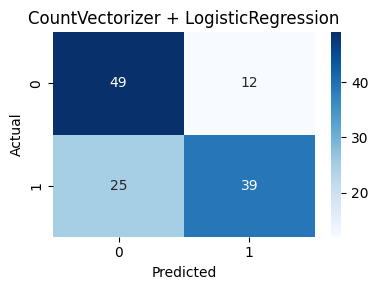

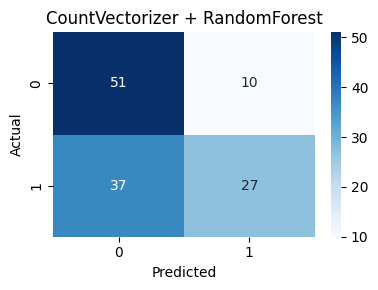

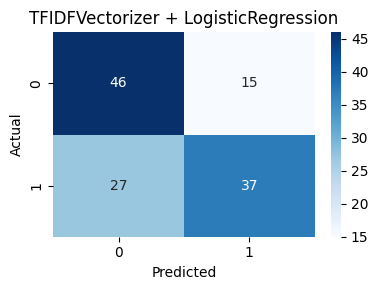

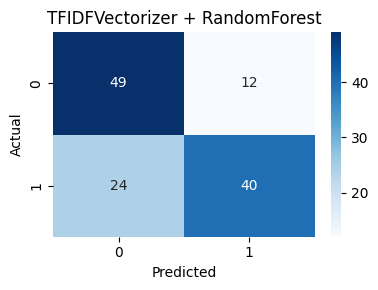

In [ ]:
import mlflow
import mlflow.sklearn
import logging
import sys
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# --- Logging setup ---
for h in logging.root.handlers[:]:
    logging.root.removeHandler(h)
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# --- Define preprocessing methods ---
vectorizers = {
    "CountVectorizer": CountVectorizer(max_features=100),
    "TFIDFVectorizer": TfidfVectorizer(max_features=100)
}

# --- Define models and hyperparameters ---
models = {
    "LogisticRegression": {
        "estimator": LogisticRegression(max_iter=1000, random_state=42),
        "param_grid": {"C": [0.1, 1.0, 10.0]}
    },
    "RandomForest": {
        "estimator": RandomForestClassifier(random_state=42),
        "param_grid": {"n_estimators": [50, 100], "max_depth": [None, 10]}
    }
    
}


# --- Loop through all combinations ---
with mlflow.start_run(run_name='All_experiments') as parent_run:
    
    for vec_name, vec in vectorizers.items():
        logging.info(f"Vectorizer: {vec_name}")

        X_train_vec = vec.fit_transform(X_train)
        X_test_vec = vec.transform(X_test)

        for model_name, model_info in models.items():
            logging.info(f"Training model: {model_name}")

            # --- Train GridSearchCV ---
            grid = GridSearchCV(
                estimator=model_info["estimator"],
                param_grid=model_info["param_grid"],
                cv=3,
                n_jobs=-1,
                verbose=0,
                return_train_score=True
            )
            grid.fit(X_train_vec, y_train)

            # --- Log each parameter combination ---
            for i, params in enumerate(grid.cv_results_["params"]):
                with mlflow.start_run(run_name=f"{vec_name}_{model_name}_grid_{i}", nested=True) as child_run:
                    # Log params and CV scores
                    mlflow.log_param("vectorizer", vec_name)
                    mlflow.log_param("model", model_name)
                    mlflow.log_params(params)

                    mlflow.log_metric("mean_test_score", grid.cv_results_["mean_test_score"][i])
                    mlflow.log_metric("mean_train_score", grid.cv_results_["mean_train_score"][i])

                    # If this is the best params, log full model, metrics, etc.
                    if params == grid.best_params_:
                        logging.info(f"Best params found: {params}")
                        
                        mlflow.set_tag("best_model", "True")
                        
                        best_model = grid.best_estimator_

                        y_pred = best_model.predict(X_test_vec)

                        acc = accuracy_score(y_test, y_pred)
                        prec = precision_score(y_test, y_pred)
                        rec = recall_score(y_test, y_pred)
                        f1 = f1_score(y_test, y_pred)

                        mlflow.log_metrics({
                            "accuracy": acc,
                            "precision": prec,
                            "recall": rec,
                            "f1": f1
                        })

                        # Log classification report
                        report = classification_report(y_test, y_pred, output_dict=True)
                        mlflow.log_dict(report, "classification_report.json")

                        # Log confusion matrix
                        conf = confusion_matrix(y_test, y_pred)
                        mlflow.log_dict({"confusion_matrix": conf.tolist()}, "confusion_matrix.json")

                        # Log confusion matrix plot
                        plt.figure(figsize=(4,3))
                        sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
                        plt.xlabel("Predicted")
                        plt.ylabel("Actual")
                        plt.title(f"{vec_name} + {model_name}")
                        plt.tight_layout()
                        plt.savefig("confusion_matrix.png")
                        mlflow.log_artifact("confusion_matrix.png")

                        # Log model
                        input_example = (
                            X_test_vec[:5].toarray() if scipy.sparse.issparse(X_test_vec)
                            else X_test_vec[:5]
                        )
                        mlflow.sklearn.log_model(best_model, "best_model", input_example=input_example)

                        logging.info(f"{vec_name} + {model_name} -> acc={acc:.3f}, f1={f1:.3f}")

logging.info("✅ All models and parameters logged to MLflow successfully!")